In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Verkauf\AppData\Local\Temp\pip-install-dkpfwuhe\tensorflow-gpu_d83ce9adaacb44af9758fe0bbd75143e\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did n

In [2]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Verkauf\AppData\Local\Temp\pip-install-vv51xeve\tensorflow-gpu_fae07bdd3cad40f7b94be39cbda4fb6a\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did n


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


In [3]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [78]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [79]:
import numpy as np
from matplotlib import pyplot as plt

In [80]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [81]:
data_iterator = data.as_numpy_iterator()

In [82]:
batch = data_iterator.next()

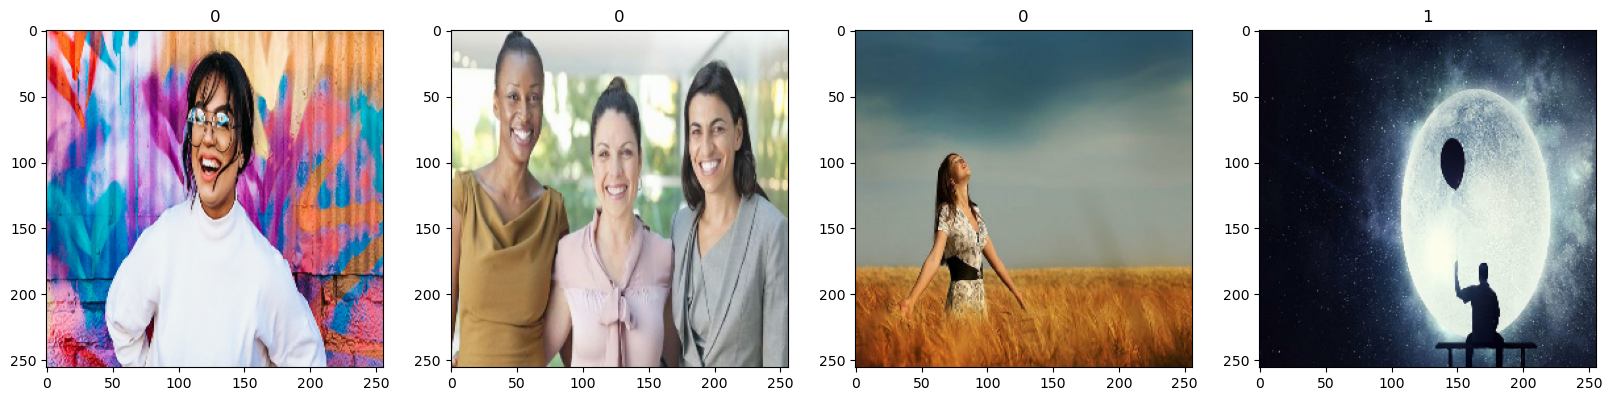

In [83]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [84]:
data = data.map(lambda x,y: (x/255, y))

In [85]:
data.as_numpy_iterator().next()

(array([[[[9.78496253e-01, 9.78496253e-01, 9.47123706e-01],
          [9.76780534e-01, 9.77086902e-01, 9.45714355e-01],
          [9.67642963e-01, 9.71564531e-01, 9.43003953e-01],
          ...,
          [9.67304051e-01, 9.69990790e-01, 9.42222178e-01],
          [9.73801553e-01, 9.77723122e-01, 9.52141047e-01],
          [9.72166061e-01, 9.76087630e-01, 9.44715083e-01]],
 
         [[9.67998445e-01, 9.68840957e-01, 9.37468410e-01],
          [9.74145532e-01, 9.78067100e-01, 9.47175622e-01],
          [9.69438851e-01, 9.74471271e-01, 9.37752068e-01],
          ...,
          [9.69549179e-01, 9.76595759e-01, 9.34847713e-01],
          [9.74719703e-01, 9.77798760e-01, 9.52584326e-01],
          [9.75022495e-01, 9.76129055e-01, 9.39600348e-01]],
 
         [[9.71807718e-01, 9.73452806e-01, 9.38826740e-01],
          [9.70567644e-01, 9.76988792e-01, 9.38117504e-01],
          [9.62774277e-01, 9.62774277e-01, 9.31401730e-01],
          ...,
          [9.71830487e-01, 9.71830487e-01, 9.3549

In [86]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [87]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [89]:
model = Sequential()

In [90]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [91]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [93]:
logdir='logs'

In [94]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [95]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 49s 9s/step - loss: 1.2717 - accuracy: 0.4375 - val_loss: 0.9162 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 37s 8s/step - loss: 0.7877 - accuracy: 0.4453 - val_loss: 0.6837 - val_accuracy: 0.5312
Epoch 3/20
4/4 [==============================] - 38s 9s/step - loss: 0.6541 - accuracy: 0.6172 - val_loss: 0.5092 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 37s 8s/step - loss: 0.5907 - accuracy: 0.6562 - val_loss: 0.5703 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 39s 9s/step - loss: 0.5450 - accuracy: 0.7344 - val_loss: 0.4790 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 43s 10s/step - loss: 0.4892 - accuracy: 0.6953 - val_loss: 0.5042 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 36s 8s/step - loss: 0.4400 - accuracy: 0.7734 - val_loss: 0.3969 - val_accuracy: 0.7812
Epoch 8/20
4/4 [=================

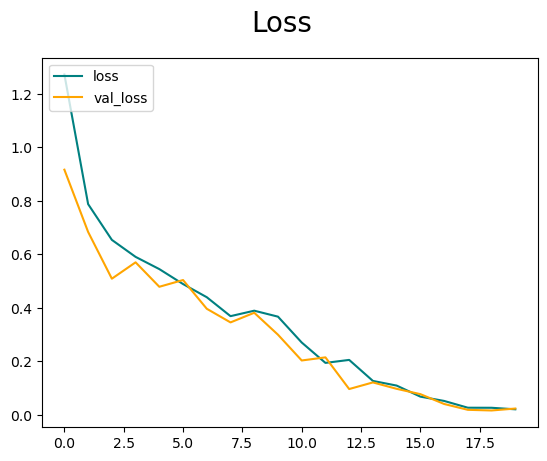

In [96]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

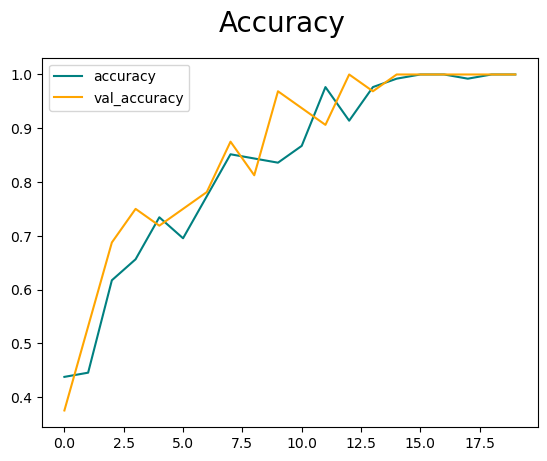

In [97]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [98]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [99]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [100]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [101]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


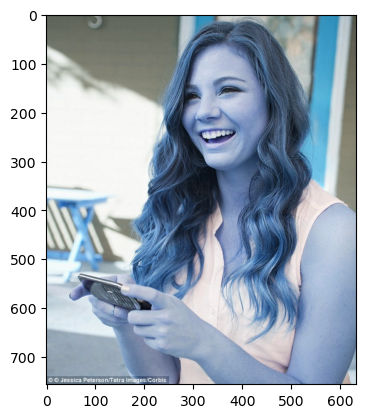

In [102]:
img = cv2.imread('happy.jpg')
plt.imshow(img)
plt.show()

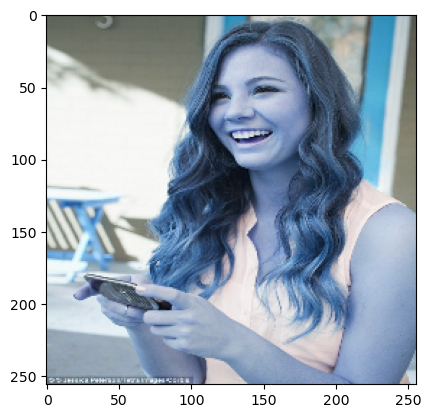

In [103]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [104]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 3s 3s/step


In [105]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [106]:
from tensorflow.keras.models import load_model

In [107]:
model.save(os.path.join('models','imageclassifier.h5'))

In [108]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [109]:
new_model.predict(np.expand_dims(resize/255, 0)) 

1/1 [==============================] - 1s 947ms/step


array([[0.62986016]], dtype=float32)